<a href="https://colab.research.google.com/github/amrrahman1/Arsenal-Data/blob/main/Arsenal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [37]:
filename = '/content/drive/MyDrive/Week51.xlsx'
df = pd.read_excel(filename)

In [135]:
df.head()

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
0,1992/93,19,9,2,8,22,20,2,29,8,56.0,10.0
1,1993/94,21,9,7,5,20,13,7,34,5,71.0,4.0
2,1994/95,19,6,6,7,23,22,1,24,11,51.0,12.0
3,1995/96,18,8,7,3,23,12,11,31,6,63.0,5.0
4,1996/97,17,10,5,2,34,16,18,35,2,68.0,3.0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28 entries, 0 to 27
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Season           28 non-null     object 
 1   Played           28 non-null     int64  
 2   Won              28 non-null     int64  
 3   Drawn            28 non-null     int64  
 4   Lost             28 non-null     int64  
 5   Goals For        28 non-null     int64  
 6   Goals Against    28 non-null     int64  
 7   Goal Difference  28 non-null     int64  
 8   Points           28 non-null     int64  
 9   Position         28 non-null     int64  
 10  Final Points     28 non-null     float64
 11  Final Position   28 non-null     float64
dtypes: float64(2), int64(9), object(1)
memory usage: 2.8+ KB


In [109]:
df.dtypes

Season              object
Played               int64
Won                  int64
Drawn                int64
Lost                 int64
Goals For            int64
Goals Against        int64
Goal Difference      int64
Points               int64
Position             int64
Final Points       float64
Final Position     float64
dtype: object

In [17]:
df.duplicated().any()


False

In [40]:
df[df.duplicated(keep = False)]

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position


In [41]:
df.isnull().sum()

Season             0
Played             0
Won                0
Drawn              0
Lost               0
Goals For          0
Goals Against      0
Goal Difference    0
Points             0
Position           0
Final Points       1
Final Position     1
dtype: int64

In [110]:
df.dropna(inplace = True)

In [111]:
df.isnull().sum()

Season             0
Played             0
Won                0
Drawn              0
Lost               0
Goals For          0
Goals Against      0
Goal Difference    0
Points             0
Position           0
Final Points       0
Final Position     0
dtype: int64

In [93]:
df.tail()

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
23,2015/16,16,10,3,3,29,13,16,33,2,71.0,2.0
24,2016/17,17,10,4,3,38,19,19,34,4,75.0,5.0
25,2017/18,18,10,3,5,31,20,11,33,5,63.0,6.0
26,2018/19,17,10,4,3,37,23,14,34,5,70.0,5.0
27,2019/20,17,5,7,5,24,27,-3,22,10,56.0,8.0


In [112]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D

In [113]:
df_won = df[['Season','Won']]
df_lost = df[['Season','Lost']]


In [80]:
last_five= df.iloc[[23,24,25,26,27]]


In [118]:
new_filter = last_five[['Won','Drawn','Lost']].sum()

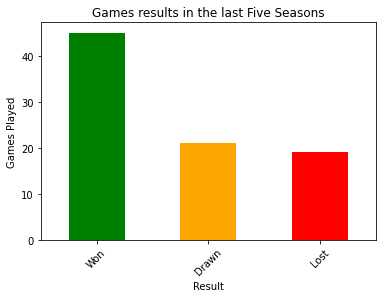

Arsenal won more games than they lost in the last 5 years


In [163]:
# This graph is to show the sum of won games vs lost and drawn in the last five years.
new_filter.plot(x='Games Played', y=['Won','Drawn','Lost'],kind ='bar', color =['green','orange','red'])
plt.xticks(rotation=45, horizontalalignment="center")
plt.title("Games results in the last Five Seasons")
plt.xlabel("Result")
plt.ylabel("Games Played")

plt.show()
print ('Arsenal won more games than they lost in the last 5 years')

In [134]:
# Arsenal won the leage 3 times only in the last 30 years 
won_leage = df.loc[df['Final Position']== 1]

,Season,Played,Won,Drawn,Lost,Goals For,Goals Against,Goal Difference,Points,Position,Final Points,Final Position
5,1997/98,18,8,6,4,32,21,11,30,5,78.0,1.0
9,2001/02,17,8,6,3,35,21,14,30,3,87.0,1.0
11,2003/04,16,11,5,0,30,11,19,38,1,90.0,1.0


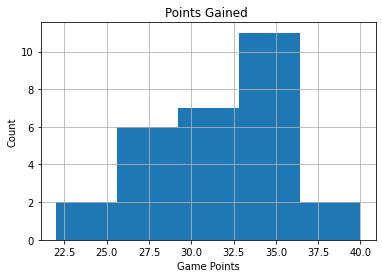

Points tend to fall around 31


In [160]:
df['Points'].hist(bins=5)
plt.xlabel('Game Points')
plt.ylabel('Count')
plt.title('Points Gained ')
plt.show()
print('Points tend to fall around 31');

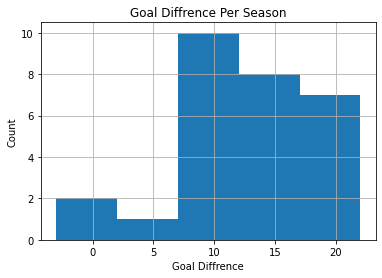

Points tend to fall around 31


In [161]:
df['Goal Difference'].hist(bins=5)
plt.xlabel('Goal Diffrence')
plt.ylabel('Count')
plt.title('Goal Diffrence Per Season')
plt.show()
print('Points tend to fall around 31');

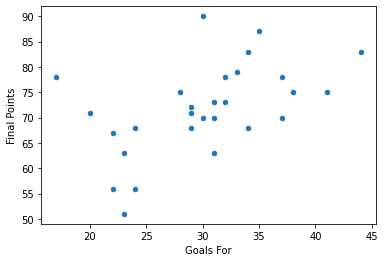

In [148]:
#It's a positive correlation stressing on the role of the offense players to win the game full points.
df.plot.scatter(x='Goals For',y='Final Points');